# AutoEncoder = 세상에 존재, 
- 영상 의학 분야 등 아직 데이터 수가 충분하지 않은 분야에서 사용
- 부족한 학습 데이터 수를 효과적으로 늘려주는 효과
- encoder & decoder

- GAN = 세상에 존재 X

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
# MNIST 데이터 셋을 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [4]:
# 생성자 모델 만들기
autoencoder = Sequential()

In [5]:
# 인코딩 부분 (입력된 값의 차원을 축소)
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same')) 
# 입력 크기를 줄이는 방법 (MaxPooling)
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
# 입력 크기를 줄이는 방법
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [6]:
# 디코딩 부분(다시 차원을 점차 늘려 입력 값과 똑같은 크기의 출력 값을 내보내)
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
# 크기를 늘리기
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
# 크기를 늘리기
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) 
# padding(크기유지) X => 3X3 mask 적용 크기 줄어듬(vector 2차원으로) => 3rd UpSampling
# 
autoencoder.add(UpSampling2D())
# 크기를 늘리기
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))
  

In [7]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# Python 3.6.4, Keras 2.3.1, Tensorflow 2.0 로 맞춰주기

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2073 - val_loss: 0.1333
Epoch 2/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1237 - val_loss: 0.1150
Epoch 3/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1122 - val_loss: 0.1076
Epoch 4/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1065 - val_loss: 0.1032
Epoch 5/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1028 - val_loss: 0.1001
Epoch 6/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1001 - val_loss: 0.0980
Epoch 7/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0981 - val_loss: 0.0968
Epoch 8/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0966 - val_loss: 0.0945
Epoch 9/50
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0952 - val_

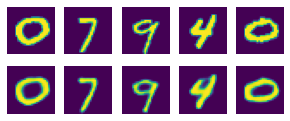

In [10]:
# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)  
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test)  # 앞서 만든 오토인코더 모델에 넣기
 
plt.figure(figsize=(7, 2))  # 출력 이미지 크기 정하기
 
for i, image_idx in enumerate(random_test):    
   # 랜덤으로 뽑은 이미지를 차례로 나열
   ax = plt.subplot(2, 7, i + 1)
   # 테스트할 이미지를 먼저 그대로 보여줌
   plt.imshow(X_test[image_idx].reshape(28, 28))  
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   # 오토인코딩 결과를 다음 열에 입력
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  
   ax.axis('off')
plt.show() 
